# Multiple Linear Regression

## Bike Sharing Assignment

### Problem Statement

#### The company wants to know:

    .Which variables are significant in predicting the demand for shared bikes.
    .How well those variables describe the bike demands

# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.metrics import r2_score


In [3]:
Bike_Sharing = pd.read_csv(r'C:\Users\nikeshv\Downloads\day.csv',parse_dates=['dteday'])
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [4]:
Bike_Sharing.shape

(730, 16)

In [5]:
len(Bike_Sharing)

730

In [6]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA QUALITY CHECK

### Checking for Null values

In [8]:
Bike_Sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Checking for percentage of Null values

In [9]:
# percentage of missing values in row wise
round(100*(Bike_Sharing.isnull().sum(axis=0)/len(Bike_Sharing.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [10]:
#percentage of missing values in column wise
round(100*(Bike_Sharing.isnull().sum(axis=1)/len(Bike_Sharing.index)), 2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

INSIGHT: There are NO MISSING VALUES/NULL values either in rows or columns.

# Removing Unwanted Columns

We will save the new dataframe as Bike, so that the original dataset is preserved for any future analysis/validation

In [11]:
Bike_Sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
Bike = Bike_Sharing[['season', 'yr','mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Converting numerical values to categorical strings

In [13]:
#Converting int type to category type

Bike['season'] = Bike['season'].astype('category')
Bike['mnth'] = Bike['mnth'].astype('category')
Bike['weekday'] = Bike['weekday'].astype('category')
Bike['weathersit'] = Bike['weathersit'].astype('category')

Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# visualising data for categorical variables
-As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

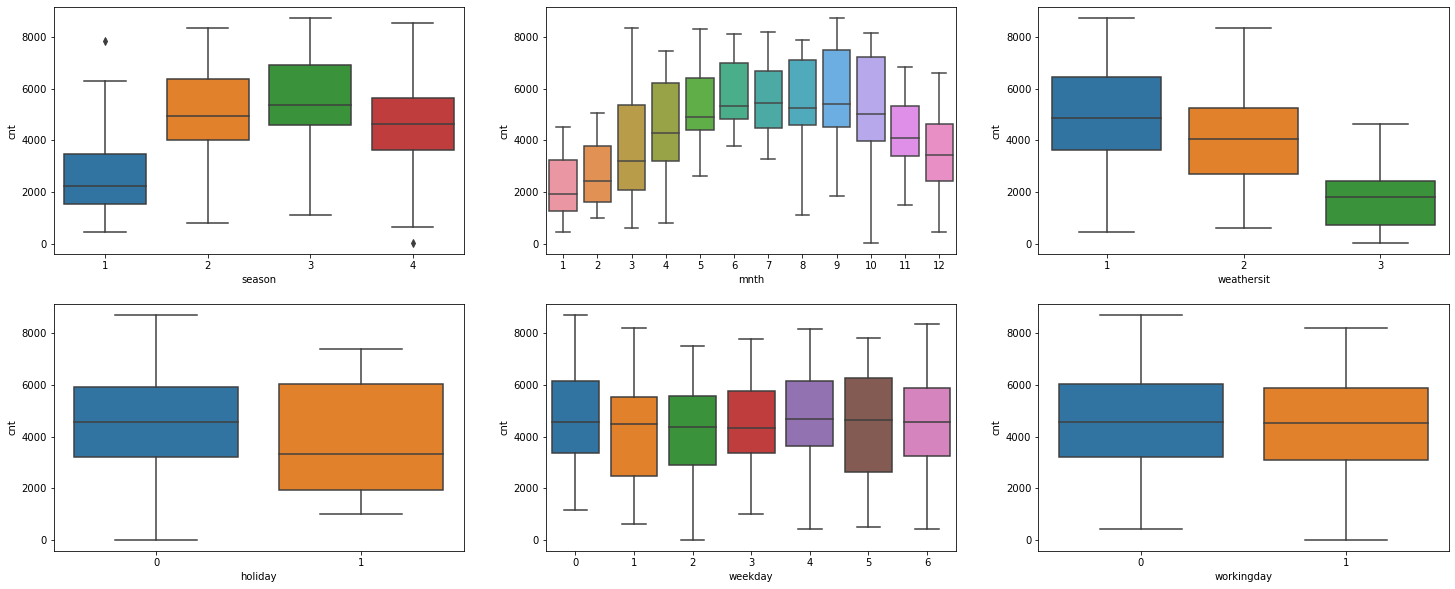

In [14]:
#Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.show()

Inferences:
   - There were 6 categorical variables in the dataset. I used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’).
   
season:- 
    - Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking.
    - season is a good predictor for the dependent variable.
    - season 2 & season 4 has around 25% to 27% total bookings.
    
mnth:
    - Almost 10% to 15% of the bike bookings were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per         mnth.
    - This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
    
weathersit:    
    - Almost 70% of the bike booking were happening during weathersit1 with a median of close to 5000 booking. This was               followed by weathersit2 with 30% of total booking. 
    - This indicates weathersit does show some trend towards the bike bookings can be a good predictor for the dependent             variable.
    
holiday:
    - It is not an good predictor for dependent variable as it has more bookings on not on holiday
    
weekday:
    - It has close trend on all weekdays of bookings and it is an good predictor for dependent variable
    
workingday:
    - Bike bookings were happening in working day with a close to median of 4000 to 5000 range and its an good predictor for         dependent variable.

# Creating Dummy variables

In [15]:
# creating dummy for season, mnth, weathersit, weekday variables
# Let's drop the first column from bike df using 'drop_first = True'

Bike = pd.get_dummies(Bike, drop_first = True)

#checking the changes after dummy creation
Bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [17]:
Bike.shape

(730, 30)

# Splitting the Data into Training and Testing Sets

In [18]:
#checking the shape before splitting the data
Bike.shape

(730, 30)

In [19]:
#importing libraries for testing and training the data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(Bike, train_size=0.7, random_state=100)

In [20]:
# Verifying the info and shape data after split

df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [21]:
print(df_train.shape)

(510, 30)


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null  

In [23]:
print(df_test.shape)

(220, 30)


# Visualising the Data

## Visualising Numerical Variables using pairplot

In [24]:
#visualising numerical variables

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

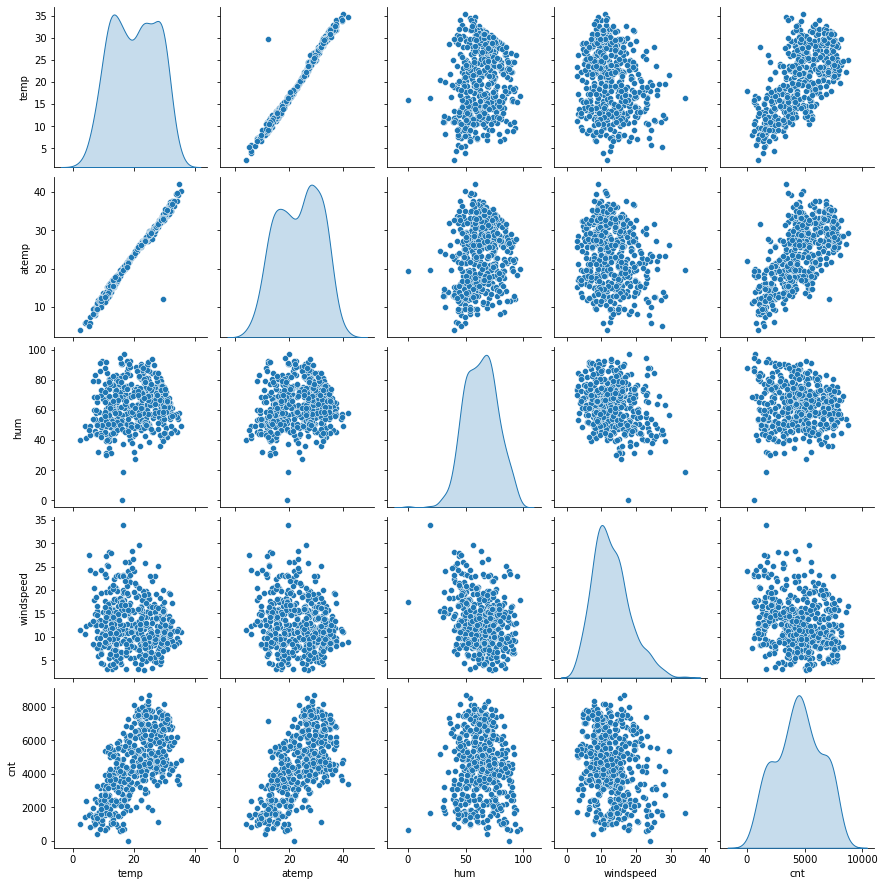

In [25]:
#creating a new dataframe only for numerical variables

bike_num = df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(bike_num, diag_kind = 'kde')
plt.show()

Note: There is an linear relationship between temp, atemp and cnt

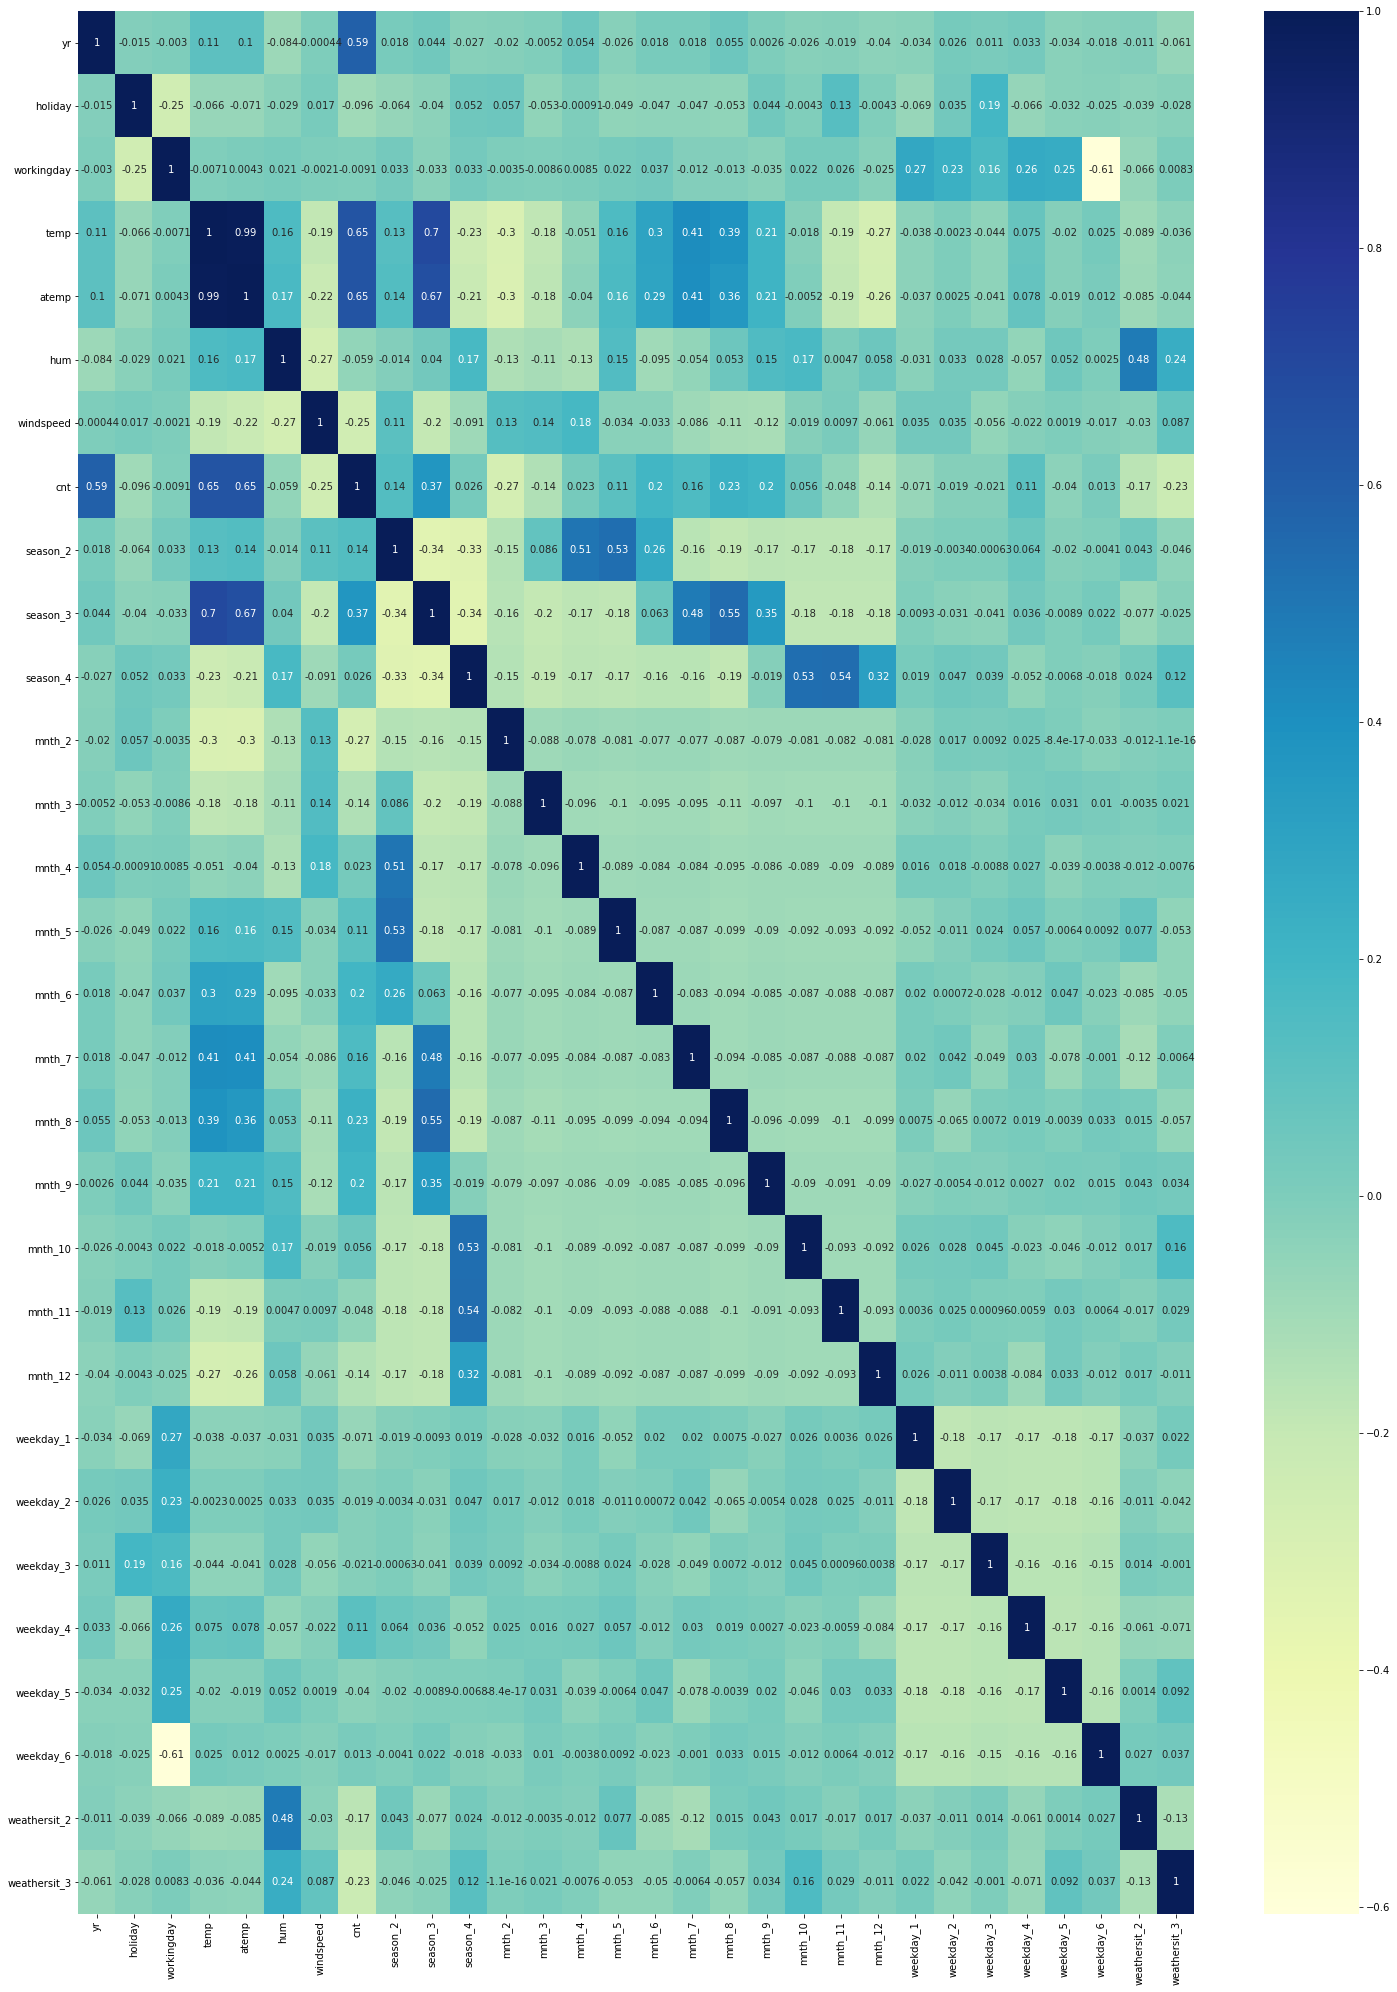

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated
# here I am doing correlation analysis for the variables stored in new dataframe Bike

plt.figure(figsize = (25,35))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Note: By using Heatmap we can able to know which variable have high collinearity with the target variable and will be decide to eliminate those variables based on calculating P-value and VIF.

# Rescaling the features

In [27]:
# Min-Max Scaling
#1.create a object
scaler = MinMaxScaler()

In [28]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [30]:
# Applying scaler to all the numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
# Checking values after scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

# Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

- we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

# RFE - (Recursive Feature Elimination)

- RFE is an efficient approach for eliminating features from a training dataset for feature selection.

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [37]:
col = X_train.columns[rfe.support_] # True columns
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_] # False columns

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


# MODEL 1

In [41]:
#Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

## Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.00e-188
Time:                        23:31:46   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665   

# MODEL 2

Note: Removing the variable "mnth_5" based on its high p-value

In [42]:
X_train_new = X_train_rfe.drop(["mnth_5"], axis = 1)

In [43]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.53
7,season_4,3.05
12,weathersit_2,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.63


In [44]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          2.46e-189
Time:                        23:31:46   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525   

# MODEL 3

Note: Removing the variable "season_3" based on its high VIF & high p-value

In [45]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,season_4,2.32
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.84
8,mnth_8,1.61
10,mnth_10,1.60
9,mnth_9,1.34


In [47]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          5.94e-190
Time:                        23:31:46   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525   

# MODEL 4

Note: Removing the variable "mnth_3" based on its high p-value

In [48]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,season_4,2.25
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.84
7,mnth_8,1.60
9,mnth_10,1.60
8,mnth_9,1.34


In [50]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.49e-190
Time:                        23:31:47   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838   

# MODEL 5

Note: Removing the variable "mnth_10", based on its high p-value

In [51]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
9,weathersit_2,2.13
0,yr,2.01
5,season_2,1.83
6,season_4,1.75
7,mnth_8,1.59
8,mnth_9,1.31
10,weathersit_3,1.16


In [53]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          7.50e-191
Time:                        23:31:47   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.623   

# MODEL 6

Note: Removing the variable "mnth_8" based on its high p-value

In [54]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
8,weathersit_2,2.11
0,yr,2.01
6,season_4,1.66
5,season_2,1.58
7,mnth_9,1.21
9,weathersit_3,1.16
1,holiday,1.04


In [56]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        23:31:47   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2261      0.027      8.331   

# MODEL 7

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
8,weathersit_2,2.11
0,yr,2.01
6,season_4,1.66
5,season_2,1.58
7,mnth_9,1.21
9,weathersit_3,1.16
1,holiday,1.04


In [58]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        23:31:48   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2261      0.027      8.331   

# MODEL 8

Note: Removing the variable "hum" based on its high VIF.

In [59]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_2,1.57
7,weathersit_2,1.48
5,season_4,1.37
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.04


In [61]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          2.83e-186
Time:                        23:31:48   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.017      7.508   

# Residual Analysis of the train data

- to check if the error terms are also normally distributed or not by using histogram

In [62]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

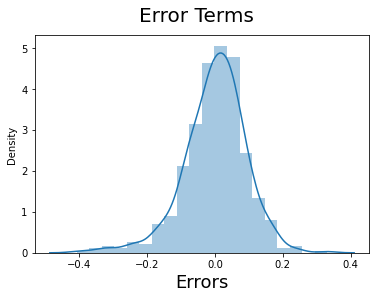

In [63]:
# Plot the histogram of the error terms
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Insight: From the above graph we can say that errors are normally distributed so by this we can conclude that our assumption Linear Regression is valid.

#### There is a linear relationship between X and Y

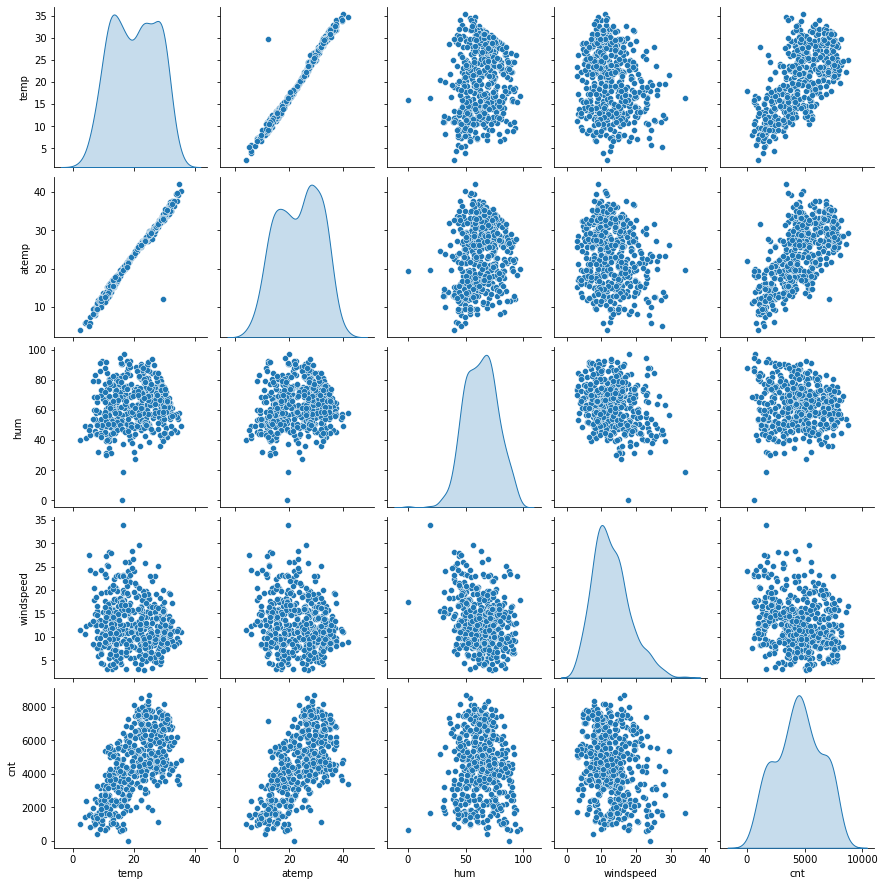

In [64]:
Bike=Bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

INSIGHT: Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’. ---

# Making Predictions

### Applying the scaling on the test sets

In [65]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [66]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weathersit_2  220 non-null    uint8  
 9   weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [70]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

# MODEL EVALUATION

Text(0, 0.5, 'y_pred')

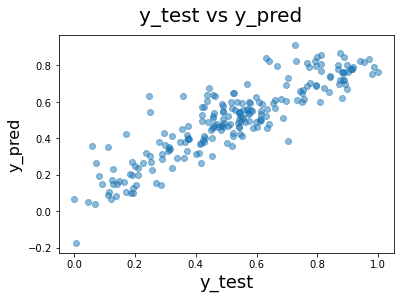

In [71]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)     # X-label
plt.ylabel('y_pred', fontsize = 16)          

# R^2 Value for TEST

In [72]:
r2_score(y_test, y_pred)

0.7853417230030578

# Adjusted R^2 Value for TEST

Formula for Adjusted R^2

R2adj.=1−(1−R2)∗n−1/n−p−1

In [73]:
# We already have the value of R^2 (calculated in above step)

r2=0.7853417230030578

In [74]:
# Get the shape of X_test

X_test.shape

(220, 9)

In [75]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7761420825603318

# Final Model Interpretation

## Hypothesis Testing:

In [76]:
Hypothesis testing states that:
    H0: B1=B2=....=Bn=0
    H1: Bi!=0    

SyntaxError: invalid syntax (<ipython-input-76-894c9dfd6793>, line 1)

lr8 model coefficient values:

  - const: 0.1259
  - yr: 0.2329     
  - holiday: -0.0987     
  - temp: 0.5480      
  - windspeed: -0.1532      
  - season_2: 0.0881      
  - season_4: 0.1293      
  - mnth_9: 0.1012      
  - weathersit_2: -0.0784      
  - weathersit_3: -0.2829 

INSIGHT: - From the lr8 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS.

# F Statistics

F-Statistics is used for testing the overall significance of the model, Higher the F-Statistics more the significant model is.

    - F-statistic:271.9
    - Prob (F-statistic):2.83e-186    
    
The F-Statistics value of 271 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.        

### The equation of our best fitted line is:

### cnt = 0.1259 + (yr* 0.2329) - (holiday* 0.0987) + (temp* 0.5480) - (windspeed* 0.1532) + (season2* 0.0881) +(season4* 0.1293) + (mnth9* 0.1012) - (weathersit2* 0.0784) - (weathersit3* 0.2829)

## Final Result Comparison

Train R^2: 0.830
Adj. Train R^2: 0.827
Test R^2: 0.7853
Adj. Test R^2: 0.7761 

- We can genralize as a good model based on the R-squared and Adj.R-squared train and test data.